[8.77, 5.35, 5.03, 6.36, 4.83, 1.56, 8.34, 8.17, 0.96, 6.76, 2.31, 7.35, 3.83, 7.01, 1.99, 8.12, 8.37, 8.99, 0.78, 3.68, 8.33, 4.75, 8.35, 8.09, 7.96, 8.49, 1.62, 6.11, 1.27, 4.1]


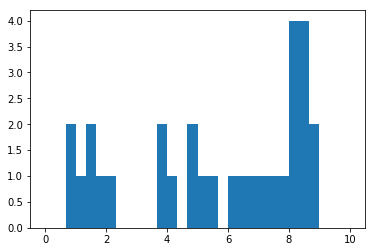

[0.00830572 0.01182127 0.02146783 0.02310734 0.03946702 0.03992467
 0.04337939 0.04545918 0.07350104 0.09458844 0.1157136  0.13363078
 0.15904141 0.18648681 0.19901116 0.2049137  0.22836229 0.23037111
 0.24022016 0.25989482 0.45027301 0.45269379 0.46749378 0.47300042
 0.51680702 0.60572547 0.66557005 0.69057166 0.72099144 0.87222132]


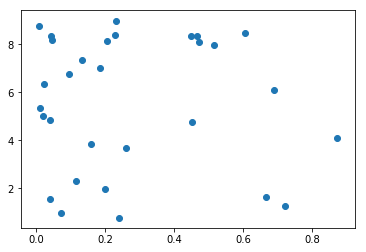

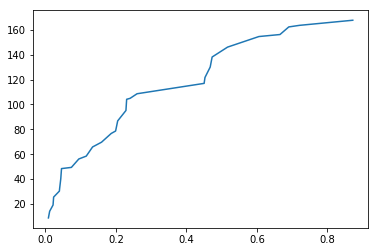

In [108]:
import numpy as np

# We imagine a set of contributions from unique funders
N_SAMPLES = 30
contributions = [
    # a list of N_SAMPLES elements, each a float between 0 and 9, following an inverse power law distribution
    # sample from a power law distribution, then scale it to be between 0 and 9, then round to 2 decimal places, N_SAMPLES times
    round(np.random.power(2) * 9, 2) for _ in range(N_SAMPLES)
    # (1 - (np.random.power(2, N_SAMPLES))) * 9,
]
print(contributions)


# plot these contributions as a histogram
import matplotlib.pyplot as plt
# show N_SAMPLES bins from x=0 to x=N_SAMPLES
plt.hist(contributions, bins=N_SAMPLES, range=(0, 10))
plt.show()


# Now we extend the contributions with another dimension of time
# Each contribution time is a value between 0 and 1
contribution_times = (1 - (np.random.power(2, N_SAMPLES)))
contribution_times.sort()
print(contribution_times)

# We can plot the contributions as a scatter plot
plt.scatter(contribution_times, contributions)
plt.show()

# Plot the cumulative sum of contributions over time
plt.plot(contribution_times, np.cumsum(contributions))
plt.show()


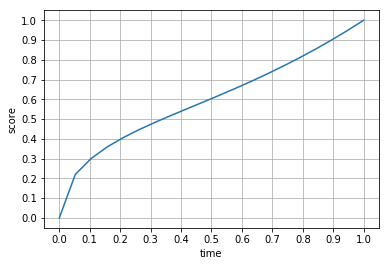

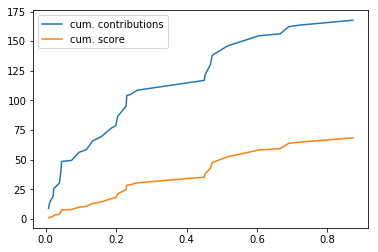

In [176]:
# import sqrt
from math import sqrt

# Define a score function which weights a contribution x and the time it is made t.
def score(cont, t):
    # f(x) begins as a sqrt, and over time becomes a linear function

    # simple function which is linear
    linear = cont * t

    # gradient function
    # return the natural log of the contribution, multiplied by the time
    # numpy compute the inverse natural log of the contribution, then multiply by the time
    # gradient = np.log(cont) * t
    gradient = cont * np.sqrt(t)

    # transition between the two functions
    # declaratively
    return gradient * (1 - t) + linear * t

    # at 0.5, it becomes a linear function
    # if t >= 0.5:
    #     return cont
    # # before 0.5, it is a sqrt function
    # else:
    #     return sqrt(cont)
    
    # Convert the above code to a smooth transition between the two functions
    # return sqrt(x) * (1 - t) + x * t


# Plot the score function, for x between 0 and 10, and t between 0 and 1
# x = np.linspace(0, 10, 20)
t = np.linspace(0, 1, 20)
# plot score for t
plt.plot(t, [score(1, t) for t in t])
# label the x,y in 0.1 increments with gridlines
plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks(np.arange(0, 1.1, 0.1))
# label the x axis time
plt.xlabel("time")
# label the y axis score
plt.ylabel("score")
plt.grid()
plt.show()

# Plot the cumulative sum of score over time
# plt.plot(contribution_times, np.cumsum([score(x) for x in contribution_times]))
# # plt.plot(contribution_times, np.cumsum(score(contributions[0])))
# plt.show()

# Plot the original cumulative sum of contributions over time, and the score weighted cumulative sum
plt.plot(contribution_times, np.cumsum(contributions), label="cum. contributions")
plt.plot(contribution_times, np.cumsum([score(x, t) for x, t in zip(contributions, contribution_times)]), label="cum. score")
plt.legend()
plt.show()